In [155]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

In [156]:
mat= scipy.io.loadmat('ex8data1')

In [157]:
X=mat['X']
Xval=mat['Xval']
yval=mat['yval']
m=X.shape[0]
n=X.shape[1]
mval=Xval.shape[0]

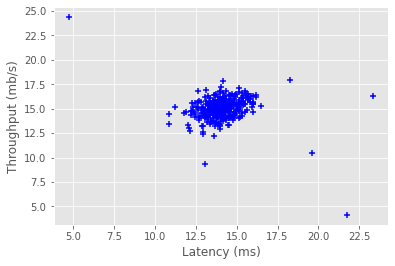

In [158]:
#plot data
plt.style.use('ggplot')
plt.scatter(X[:,0],X[:,1],marker='+',c='blue')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

In [159]:
#Gaussian Curve
mu=np.mean(X,axis=0)
var=np.var(X,axis=0)
p=(1/((2*np.pi*var)**0.5))*(np.exp(-((X-mu)**2)/(2*var))) #Gaussian Distribution

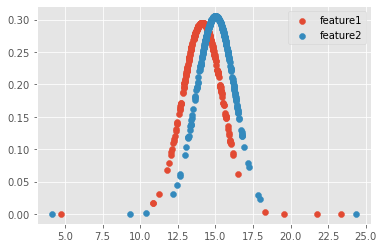

In [160]:
plt.scatter(X[:,0],p[:,0],label='feature1')
plt.scatter(X[:,1],p[:,1],label='feature2')
plt.legend()

In [161]:
#calculating P for validation set

p_t=(1/((2*np.pi*var)**0.5))*(np.exp(-((Xval-mu)**2)/(2*var)))
pval=p_t[:,0]*p_t[:,1]
pval=pval.reshape(mval,1)
yval.shape


(307, 1)

In [192]:
#Calcualting Epsilon
step=(pval.max()-pval.min())/1000
#print(step)
it=0
eps=np.arange((pval.min()),(pval.max()),step)
it=len(eps)
i=0
f1=np.zeros((it))

for i in range(1000):
#for epsilon in np.arange((pval.min()),(pval.max()),step):
    
    predict= np.zeros((mval,1))
    predict[pval<eps[i]]=1
    pred=np.zeros
    
    #calculating F score
    tp=np.sum((yval==1)&(predict==1))
    fp=np.sum((predict==1)&(yval==0))
    fn=np.sum((predict==0)&(yval==1))
    if (tp+fp)!=0:
        prec= tp/(tp+fp)
        rec=tp/(tp+fn)
        f1[i]=2*prec*rec/(prec+rec)
    i=i+1

#selecting epsilon value

epsilon=pval.min()+ np.argmax(f1)*step   
print(epsilon)
print(f1.max())

8.990852779269492e-05
0.8750000000000001
